# Khipus.ai
## Unsupervised Learning
### Clustering Algorithms
### Case Study: Market Segmentation

<span>© Copyright Notice 2025, Khipus.ai - All Rights Reserved.</span>


## Import the relevant libraries

In [75]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


## Load the data

In [76]:
# Load the dataset
file_path = 'customer_feedback_satisfaction.csv'
data = pd.read_csv(file_path)

# Display the first few rows
data.head()

,CustomerID,Age,Gender,Country,Income,ProductQuality,ServiceQuality,PurchaseFrequency,FeedbackScore,LoyaltyLevel,SatisfactionScore
0,5,60,Male,UK,97546,6,4,13,Low,Bronze,82.00
1,6,25,Male,France,49364,5,7,19,High,Silver,80.71
2,10,40,Female,UK,85307,6,4,20,High,Gold,86.48
3,11,28,Female,Canada,46732,9,3,3,High,Gold,94.60
4,12,28,Female,France,38742,8,6,13,Medium,Silver,81.85


## Plot the data (Y = Age, X = SatisfactionScore)

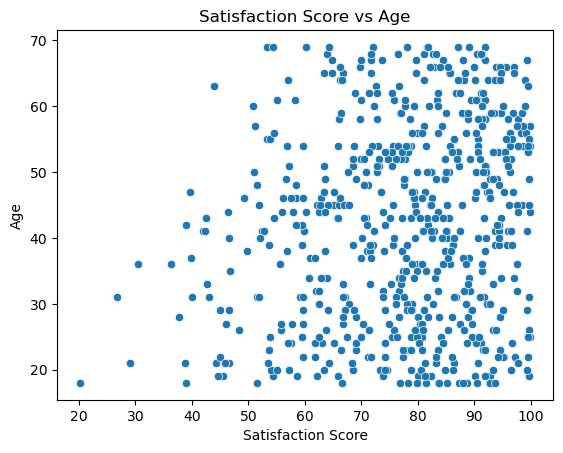

In [77]:
# Plotting Satisfaction Score vs Loyalty Level
import seaborn as sns
sns.scatterplot(x=data['SatisfactionScore'], y=data['Age'])
plt.title("Satisfaction Score vs Age")
plt.xlabel("Satisfaction Score")
plt.ylabel("Age")
plt.show()

## Select the features

In [78]:
# Selecting features for clustering
features = data[['SatisfactionScore', 'Age']]
features.head()

,SatisfactionScore,Age
0,82.00,60
1,80.71,25
2,86.48,40
3,94.60,28
4,81.85,28


## Clustering analysis

In [79]:
# Performing clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(features)

# Adding the cluster labels to the dataset
data['Cluster'] = kmeans.labels_
data.head()

c:\Users\sanikj\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\sanikj\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,CustomerID,Age,Gender,Country,Income,ProductQuality,ServiceQuality,PurchaseFrequency,FeedbackScore,LoyaltyLevel,SatisfactionScore,Cluster
0,5,60,Male,UK,97546,6,4,13,Low,Bronze,82.00,2
1,6,25,Male,France,49364,5,7,19,High,Silver,80.71,1
2,10,40,Female,UK,85307,6,4,20,High,Gold,86.48,1
3,11,28,Female,Canada,46732,9,3,3,High,Gold,94.60,1
4,12,28,Female,France,38742,8,6,13,Medium,Silver,81.85,1


## Clustering results

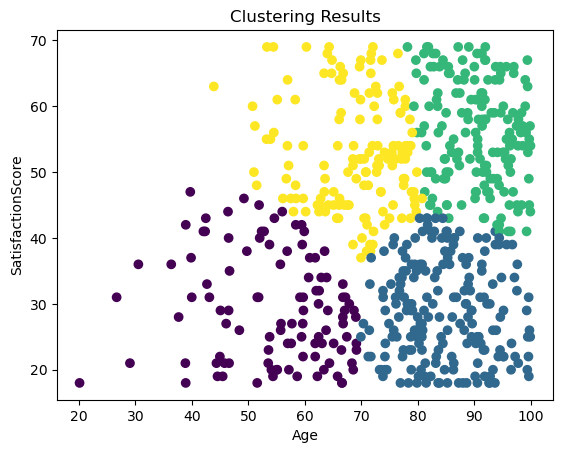

In [80]:
# Plotting the clustering results
plt.scatter(features['SatisfactionScore'], features['Age'], c=data['Cluster'], cmap='viridis')
plt.title("Clustering Results")
plt.xlabel("Age")
plt.ylabel("SatisfactionScore")
plt.show()

## Standardize the variables

In [81]:
# Standardizing the variables
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

features_scaled[:5]

array([[ 0.29449345,  1.21311577],
       [ 0.2093034 , -1.12926934],
       [ 0.59034728, -0.12539001],
       [ 1.12658235, -0.92849347],
       [ 0.28458763, -0.92849347]])

## Use the Elbow method

c:\Users\sanikj\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\sanikj\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\sanikj\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\sanikj\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

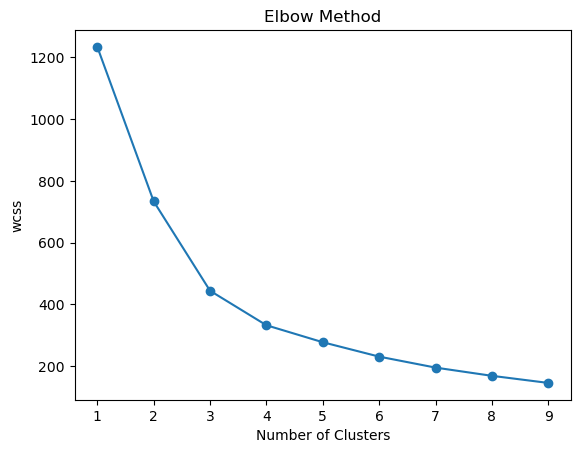

In [82]:
# Using the Elbow Method to find the optimal number of clusters
wcss = []
range_n_clusters = range(1, 10)

for n in range_n_clusters:
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range_n_clusters, wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("wcss")
plt.show()

## Explore clustering solutions and select the number of clusters

c:\Users\sanikj\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\sanikj\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


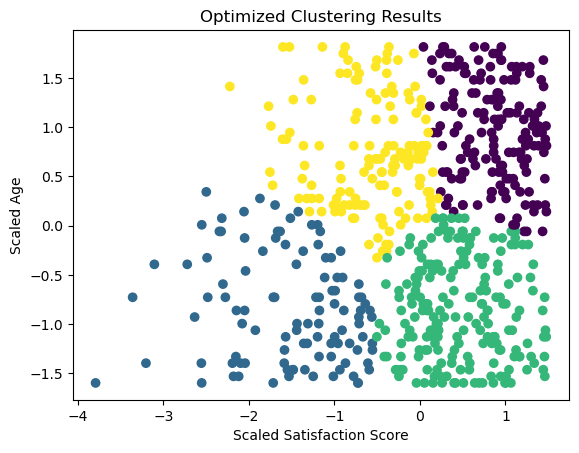

In [84]:
# Final clustering with the optimal number of clusters (4)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(features_scaled)

# Adding the cluster labels to the dataset
data['Cluster_Optimized'] = kmeans.labels_

# Visualizing the final clustering solution
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=data['Cluster_Optimized'], cmap='viridis')
plt.title("Optimized Clustering Results")
plt.xlabel("Scaled Satisfaction Score")
plt.ylabel("Scaled Age")
plt.show()

Note: We can divide the dataset into 4 groups. 

1. Middle-Age & Old Medium-Satisfaction
2. Middle-Age & Old High-Satisfaction
3. Young Low-Satisfaction
4. Young High-Satisfaction